<a href="https://colab.research.google.com/github/DJCordhose/ai/blob/master/notebooks/tensorflow/nn-prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

Populating the interactive namespace from numpy and matplotlib


In [2]:
!curl -O https://raw.githubusercontent.com/DJCordhose/deep-learning-crash-course-notebooks/master/data/insurance-customers-1500.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26783  100 26783    0     0   111k      0 --:--:-- --:--:-- --:--:--  110k


In [0]:
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')

In [0]:
# sns.pairplot?

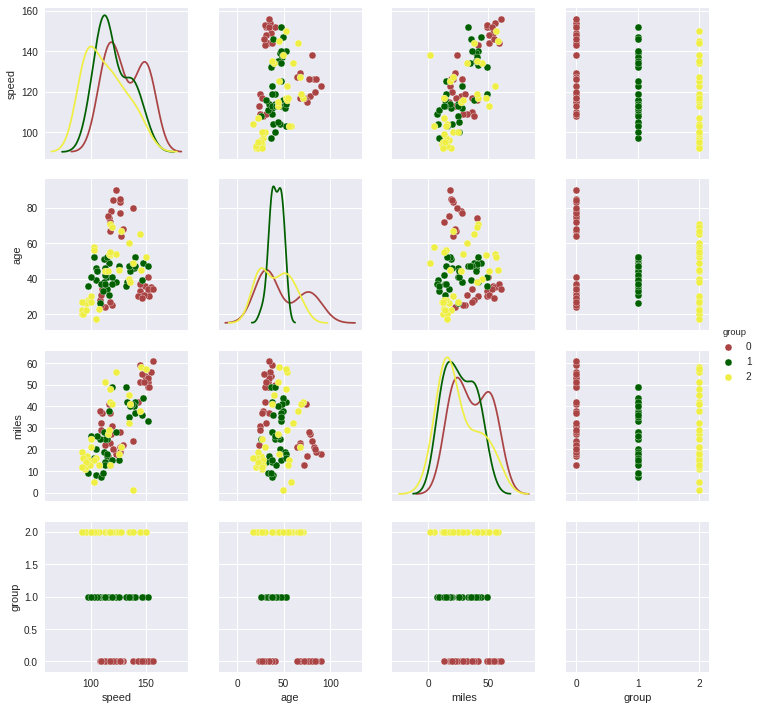

In [31]:
import seaborn as sns

sample_df = df.sample(n=100, random_state=42)
sns.pairplot(sample_df, hue="group", palette={0: '#AA4444', 1: '#006000', 2: '#EEEE44'}, diag_kind='kde')

In [0]:
y = df['group']
X = df.drop('group', axis='columns')

# STOP HERE

In [33]:
from tensorflow.keras.layers import Dense

model = keras.Sequential()

model.add(Dense(units=50, activation='relu', input_dim=3))
model.add(Dense(units=3, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 153       
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [34]:
%%time

BATCH_SIZE=1000
EPOCHS = 2000

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(X, y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)

CPU times: user 24.3 s, sys: 2.55 s, total: 26.9 s
Wall time: 19.3 s


In [37]:
loss, accuracy = model.evaluate(X, y, batch_size=BATCH_SIZE)
loss, accuracy

1500/1500 [==============================] - 0s 9us/sample - loss: 0.6966 - acc: 0.7147


(0.696560005346934, 0.71466666)

In [38]:
np.argmax(model.predict(np.array([[100, 47, 10]])))

1

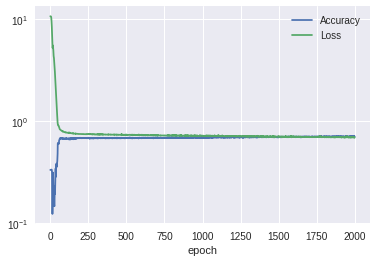

In [39]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.yscale('log')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'])